In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [ ]:
stock_symbol = 'RELIANCE.NS'

In [ ]:
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-20,929.192200,933.006042,912.549927,919.187012,899.512939,3381269
2018-04-23,921.267334,935.482544,919.781372,927.210938,907.365112,3541772
2018-04-24,927.012817,966.538208,926.220337,960.941223,940.373474,9193591
2018-04-25,964.507446,972.580933,954.502258,961.387024,940.809692,6497632
2018-04-26,963.863525,978.722717,953.214478,966.191467,945.511353,15735759


**Exploratory Data Analysis**

Text(0.5, 1.0, 'Closing Price of data')

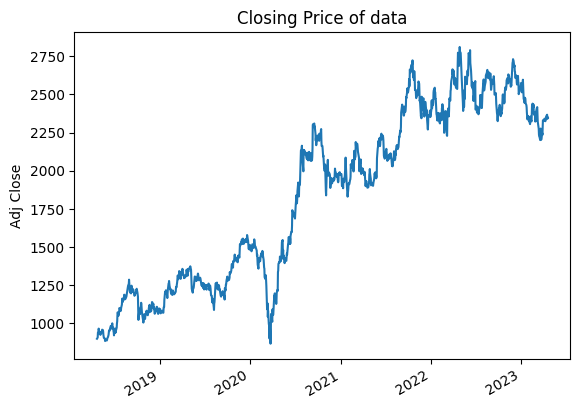

In [ ]:

    data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of data")

Text(0.5, 1.0, 'Sales Volume for Reliance')

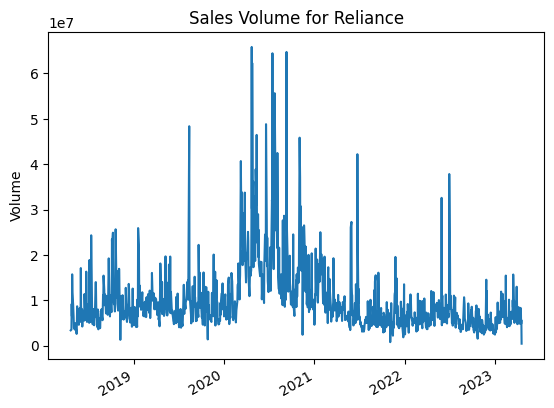

In [ ]:
    data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for Reliance")

In [ ]:
  data['Daily Return'] = data['Adj Close'].pct_change()

<Axes: xlabel='Date'>

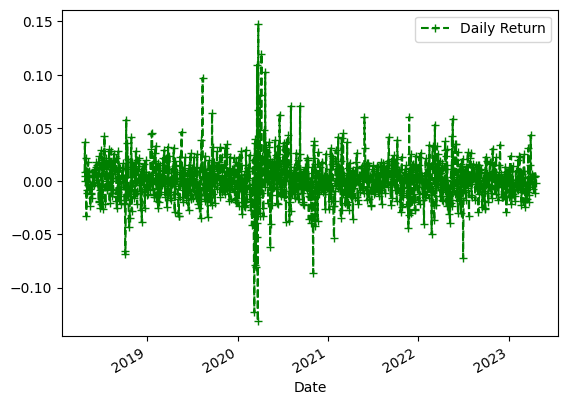

In [ ]:

data['Daily Return'].plot( legend=True, linestyle='--', marker='+',color='g')


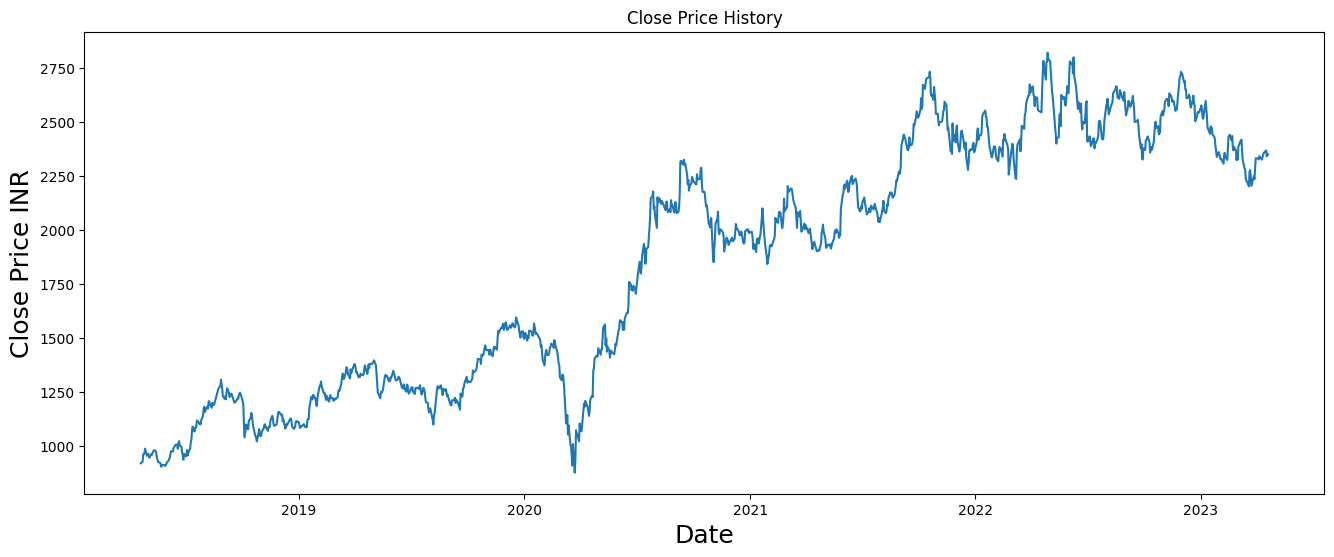

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

 **PREPROCESSING for ML **

In [ ]:
# Create a new dataframe with only the 'Close column
df = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1174

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02234361],
       [0.02647092],
       [0.04382099],
       ...,
       [0.75335648],
       [0.75934891],
       [0.75754859]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02234361, 0.02647092, 0.04382099, 0.0440503 , 0.04652159,
       0.0571966 , 0.04038157, 0.04517129, 0.03951532, 0.03561731,
       0.04430507, 0.04231783, 0.04720949, 0.04947696, 0.05360428,
       0.05225398, 0.04835597, 0.0367383 , 0.03123519, 0.02537543,
       0.02410154, 0.02175765, 0.0143692 , 0.01620358, 0.01872583,
       0.01852201, 0.01701885, 0.01633095, 0.01900609, 0.02369391,
       0.02894225, 0.03240716, 0.03584658, 0.04448339, 0.0511075 ,
       0.05024128, 0.05762969, 0.06035579, 0.06313281, 0.06631749,
       0.06700535, 0.0570692 , 0.06889069, 0.07536193, 0.06545124,
       0.06134941, 0.04835597, 0.04168091, 0.03103137, 0.04504392,
       0.03900577, 0.04445793, 0.05403741, 0.04099302, 0.04764258,
       0.05760423, 0.07217725, 0.07885231, 0.10104308, 0.10993466])]
[0.09790935345161567]

[array([0.02234361, 0.02647092, 0.04382099, 0.0440503 , 0.04652159,
       0.0571966 , 0.04038157, 0.04517129, 0.03951532, 0.03561731,
       0.04430507, 0.04231783, 0.04

**RNN MODEL**

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1114/1114 [==============================] - 57s 47ms/step - loss: 0.0038
Epoch 2/2
1114/1114 [==============================] - 53s 48ms/step - loss: 0.0014


 this code creates a sequential model with two LSTM layers and two fully connected layers, and trains it to predict a single output value for each input sequence. This type of model is commonly used for sequence prediction tasks such as time series forecasting The model is trained using the mean squared error loss function and the Adam optimizer, which are popular choices for deep learning tasks.

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 3s 91ms/step


105.09325133017208

**validation and prediction**

<ipython-input-33-ddc2b60a53b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


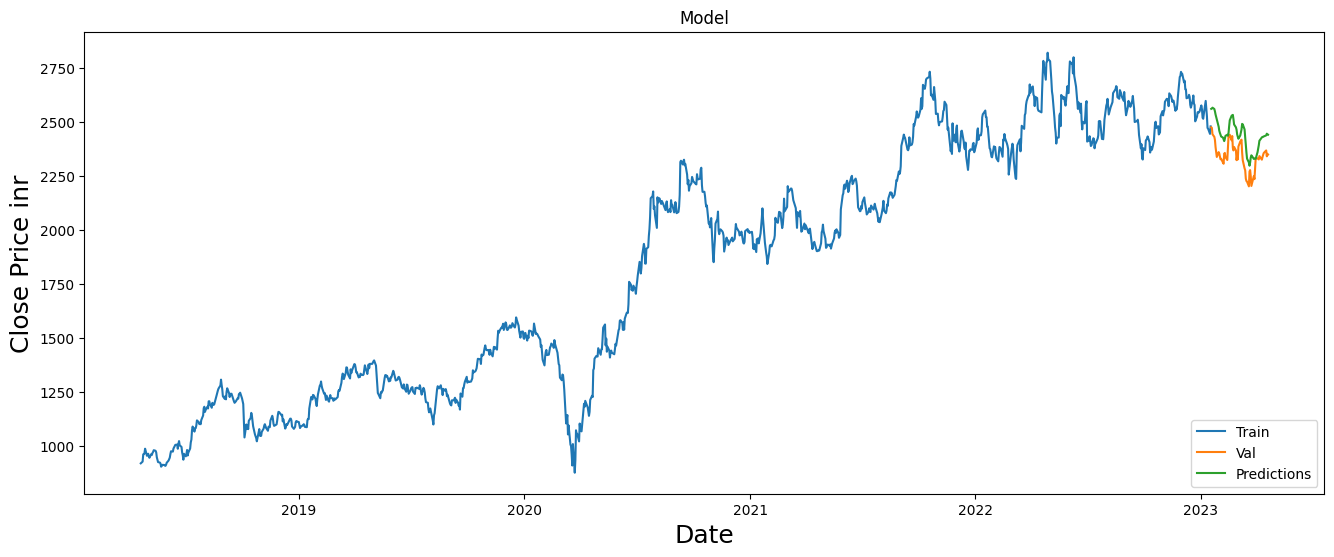

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price inr', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()